#IMPORTING LIBRARIES

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#LOADING DATA

In [229]:
data=pd.read_csv(r'housing_price.csv')

#UNDERSTANDING AND HANDLING DATA

In [230]:
data.shape

(1460, 81)

In [231]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [232]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [233]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,...,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,...,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [234]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Thus it can be concluded a large number of null values are present in the data.**

In [236]:
null_percent=data.isnull().sum()/data.shape[0]*100            #checking the null percentage in each column
null_percent

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [237]:
col_for_drop=null_percent[null_percent>30].keys()           #dropping the columns having more than 30 percentage of null values
col_for_drop

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [238]:
to_drop=[]
for i in range(len(col_for_drop)):
  to_drop.append(i)
data= data.drop(data.columns[to_drop],axis=1)

In [239]:
 data.shape

(1460, 76)

**Thus the column number reduced from 81 to 76 .**

**Dividing the dataset into numerical and categorical features.**

### NUMERICAL FEATURES

In [240]:
numerical_features=[feature for feature in data.columns if data[feature].dtypes!='O']
print('Number of numerical variables : ',len(numerical_features))
numerical_features

Number of numerical variables :  34


['OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

TEMPORAL VARIABLE(DATE-TIME VARIABLE)

In [241]:
year_feature=[feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]   #LISTING ALL FEATURES HAVING YEAR IN THEM
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [242]:
for feature in year_feature:
  print(feature,data[feature].unique())


YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

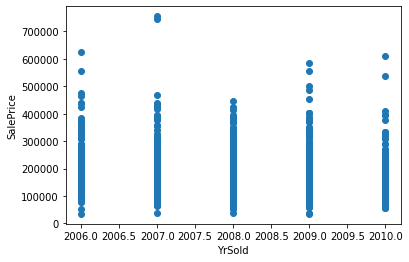

In [243]:
plt.scatter(data['YrSold'],data['SalePrice'])                                   #showing the scatter plot between Yrsold and target variable
plt.xlabel('YrSold')
plt.ylabel('SalePrice')
plt.show()

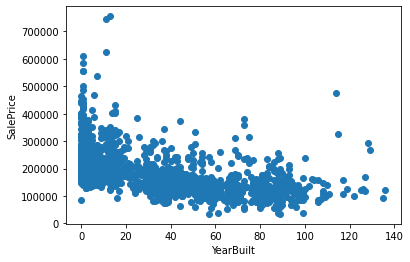

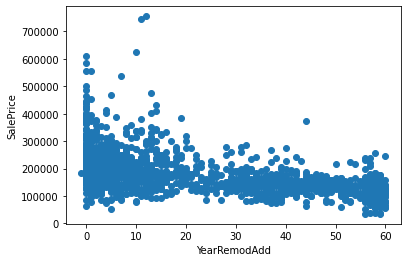

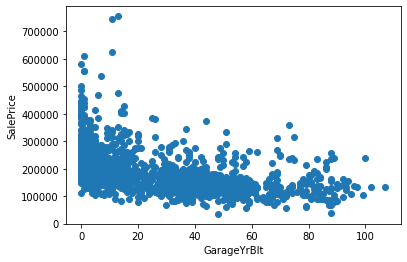

In [244]:
for feature in year_feature:
  if feature!='YrSold':                                                         #we will be taking the difference between each feature and the Yrsold and plotting them against saleprice
    dataset=data.copy()
    dataset[feature]=dataset['YrSold']-dataset[feature]
    plt.scatter(dataset[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

Dividing the numerical features into discrete and continuous features. 

### DISCRETE FEATURES

In [245]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 16


In [246]:
discrete_feature

['OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [247]:
data[discrete_feature].head()

,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


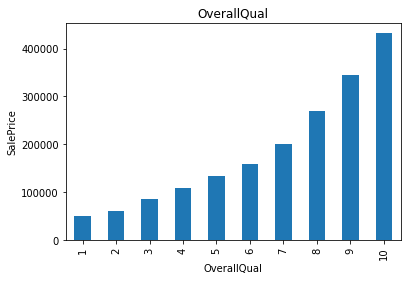

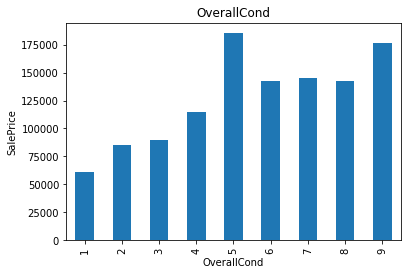

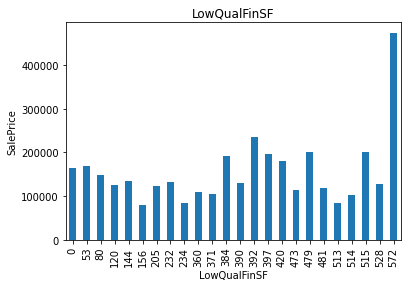

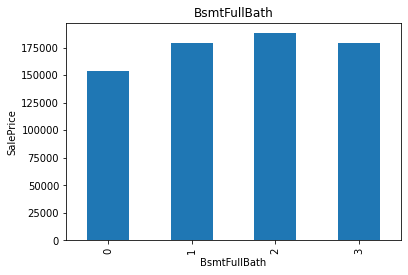

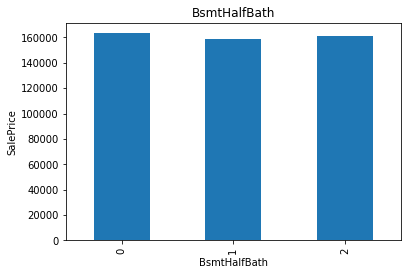

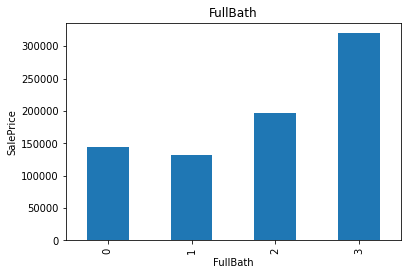

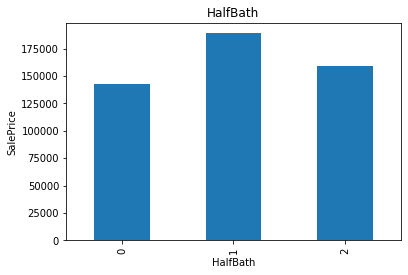

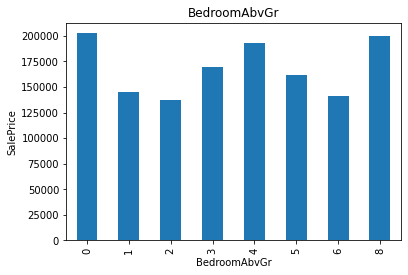

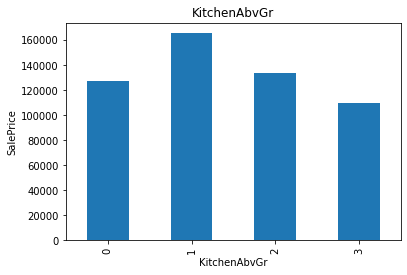

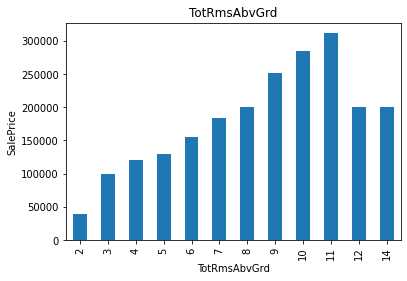

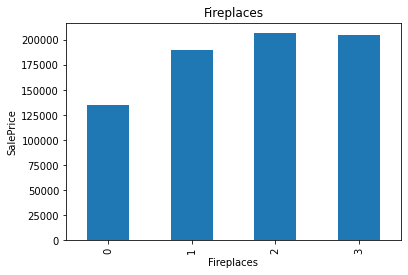

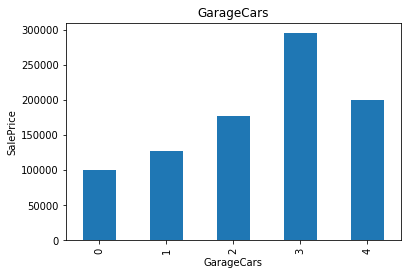

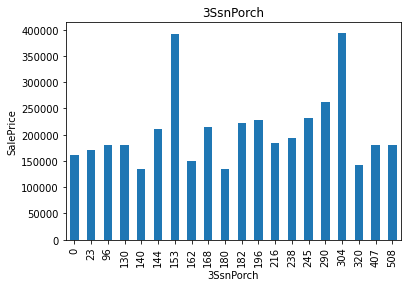

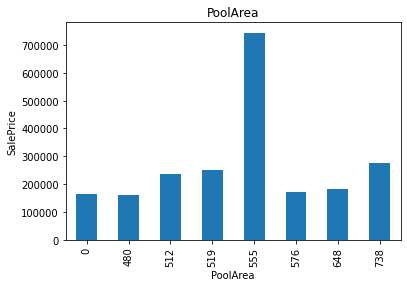

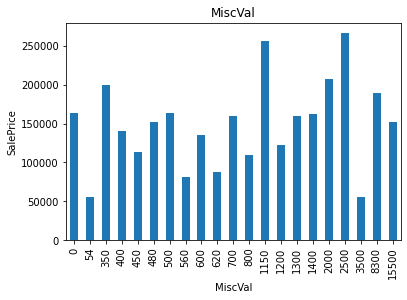

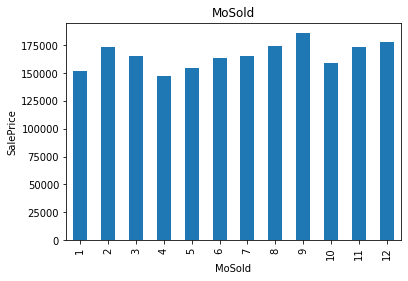

In [248]:
for feature in discrete_feature:
  dataset=data.copy()
  dataset.groupby(feature)['SalePrice'].median().plot.bar()                     #showing the relation between sale price and each column
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

### CONTINUOUS FEATURE

In [250]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Number of continuous_feature is",len(continuous_feature))
continuous_feature

Number of continuous_feature is 14


['MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

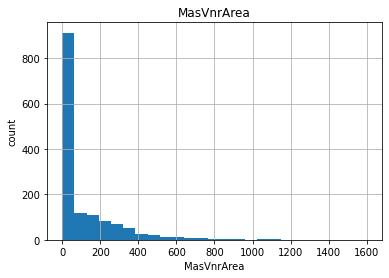

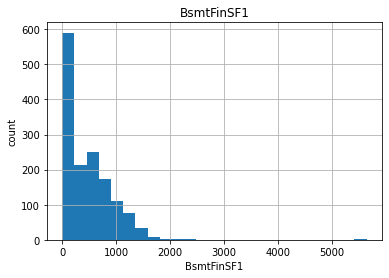

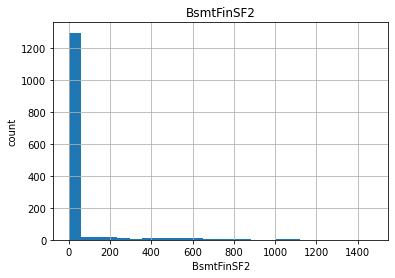

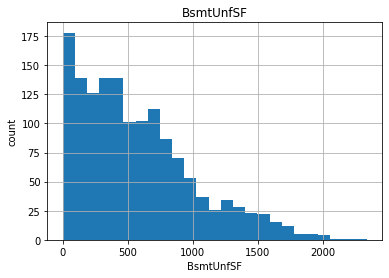

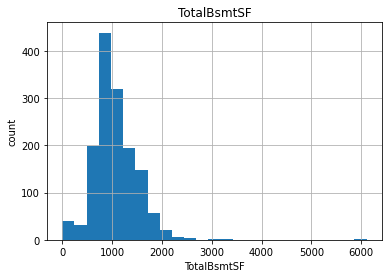

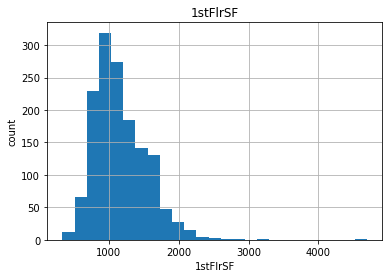

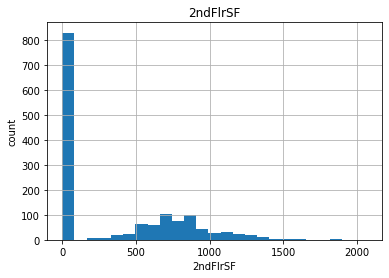

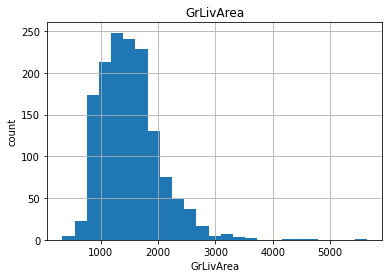

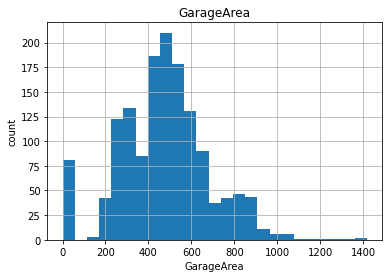

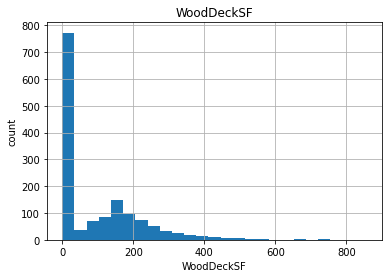

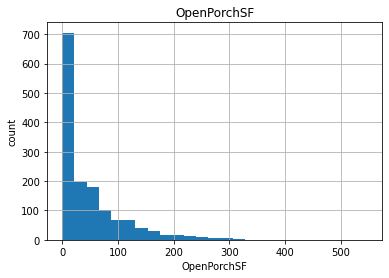

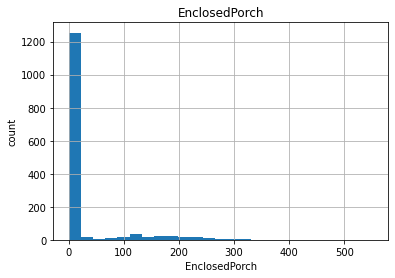

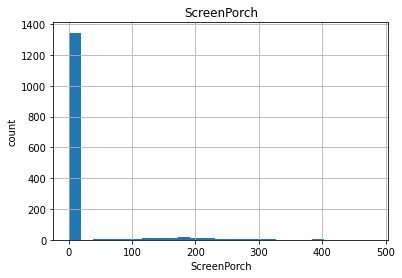

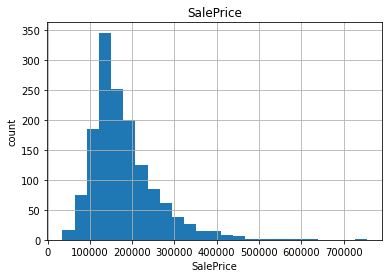

In [251]:
for feature in continuous_feature:
  dataset=data.copy()
  dataset[feature].hist(bins=25)
  plt.xlabel(feature)
  plt.ylabel('count')
  plt.title(feature)
  plt.show()

**It can be observed that most of the categorical features have skewed distribution.So we will using log transformation.**

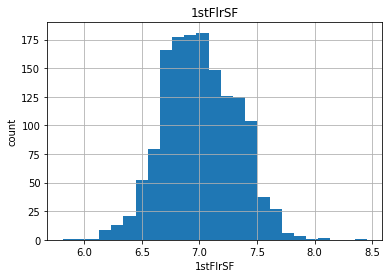

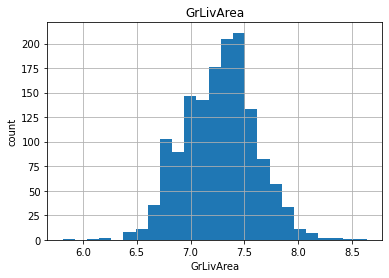

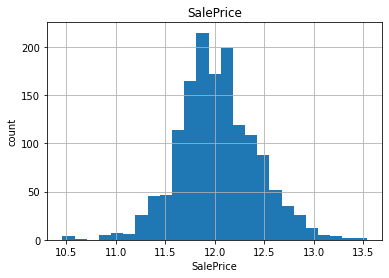

In [252]:
for feature in continuous_feature:
  
  if 0 in data[feature].unique():                                            #if unique value is zero then log of o will be undefined so we need to pass it on.
    pass
  else:
    data[feature]=np.log(data[feature])
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

### CATEGORICAL FEATURES

In [253]:
categorical_features=[feature for feature in data.columns if data[feature].dtype=='O']
categorical_features

['Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [254]:
data[categorical_features].head()

,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [255]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))       #listing the number of categories in each column

The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of categories are 5
The feature is ExterQual and number of cat

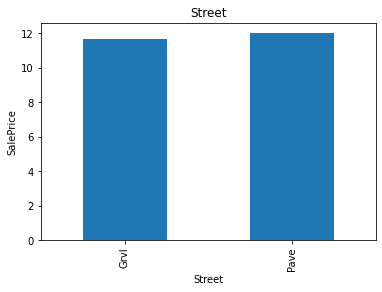

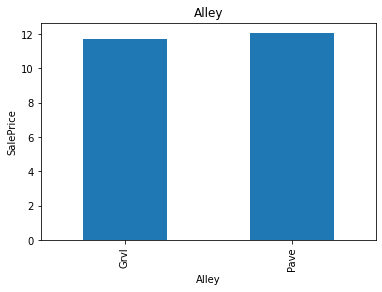

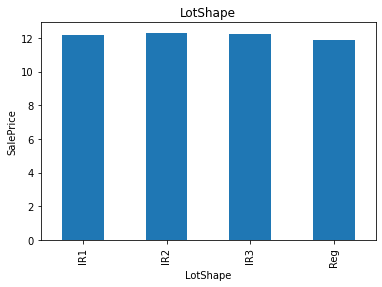

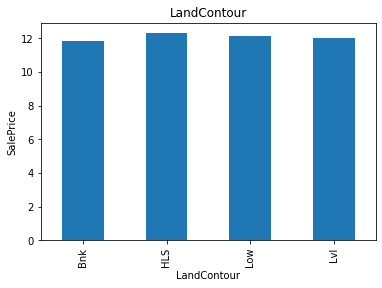

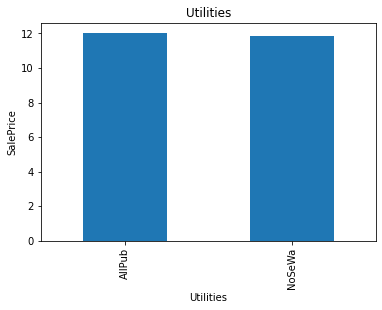

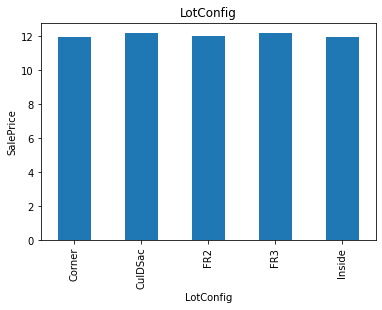

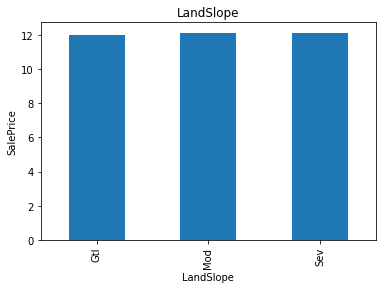

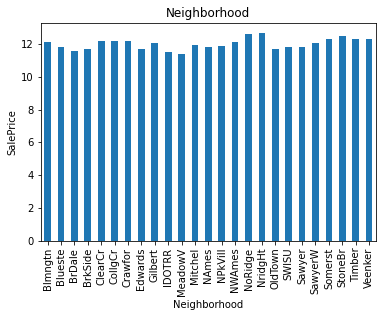

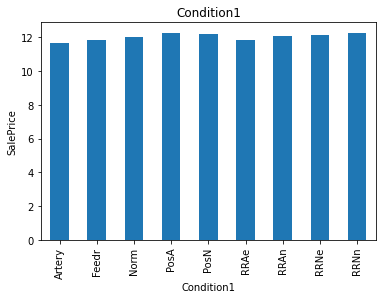

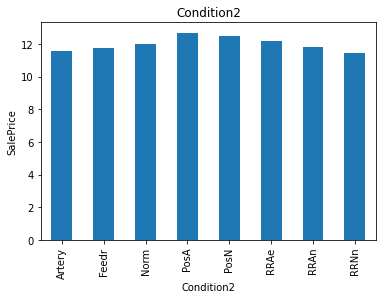

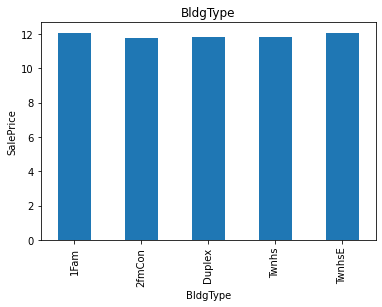

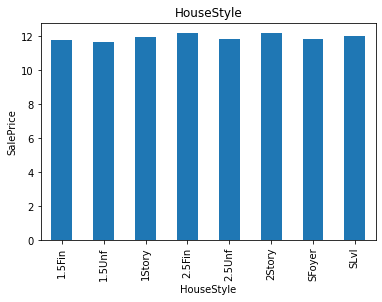

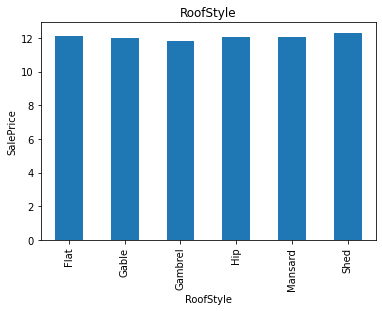

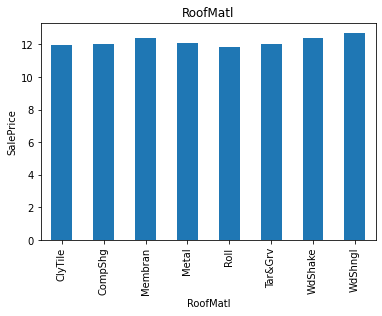

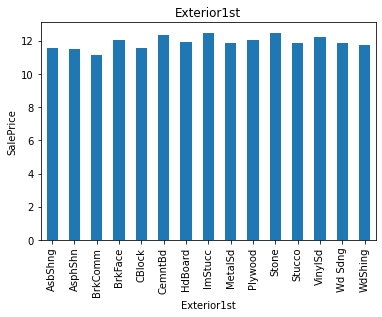

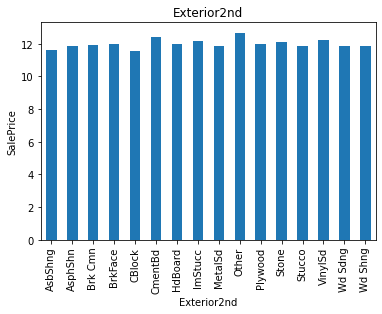

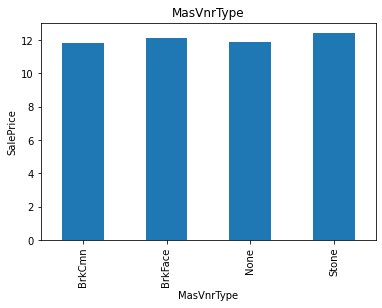

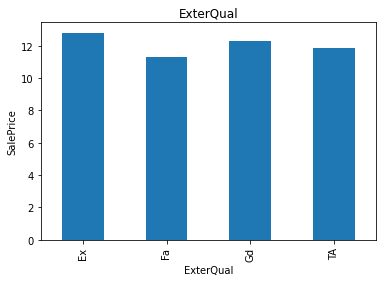

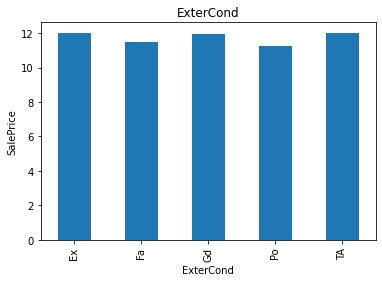

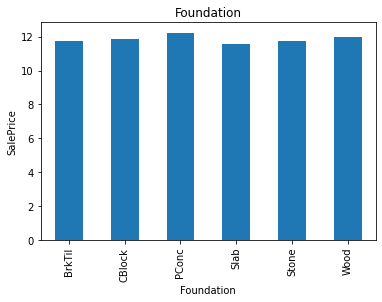

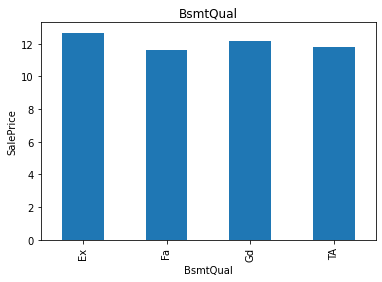

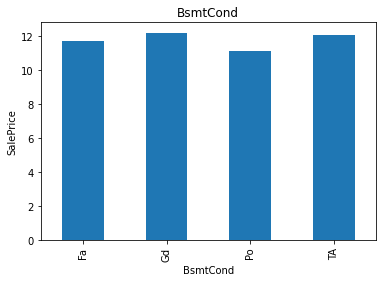

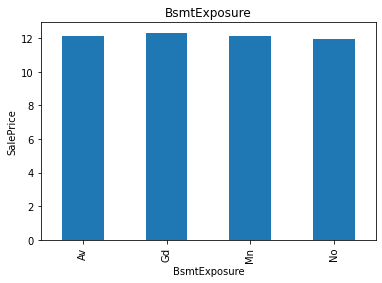

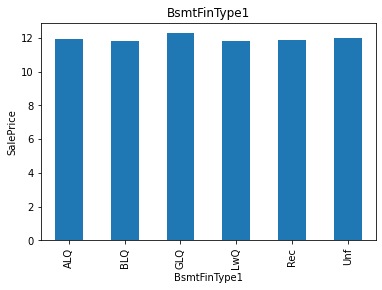

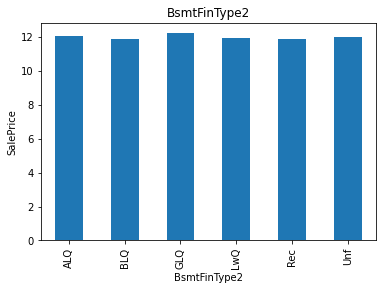

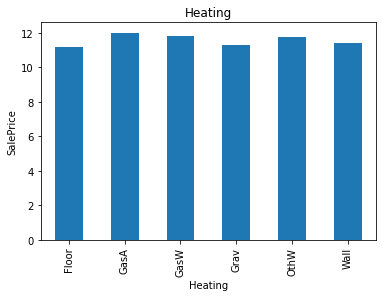

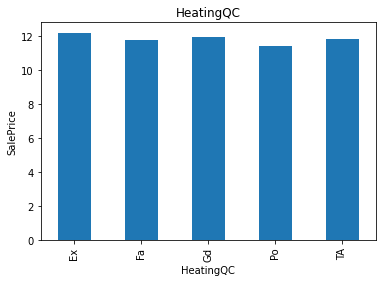

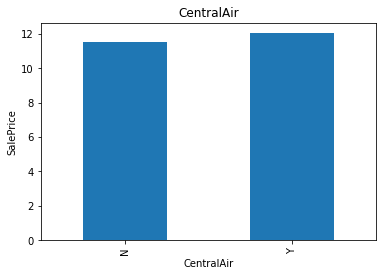

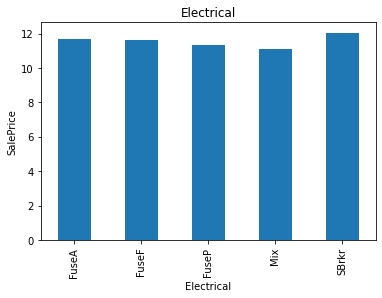

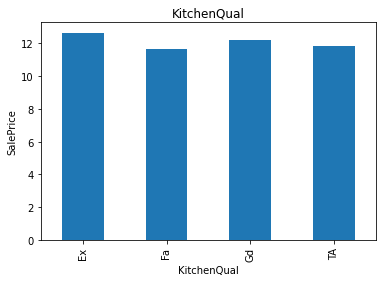

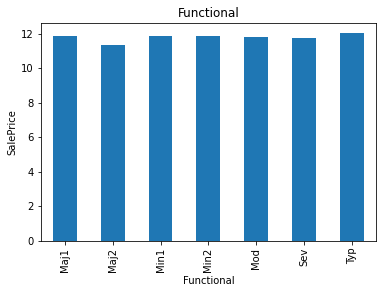

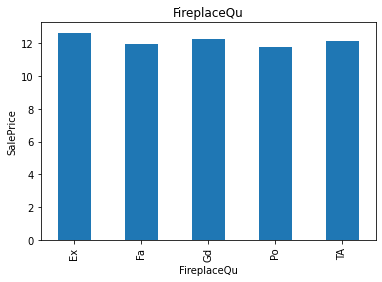

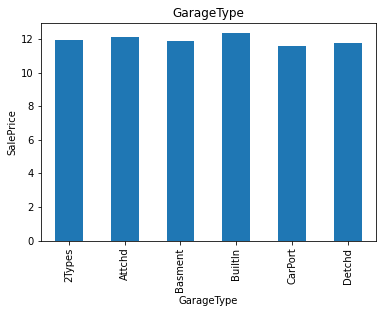

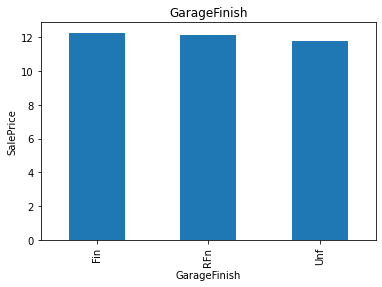

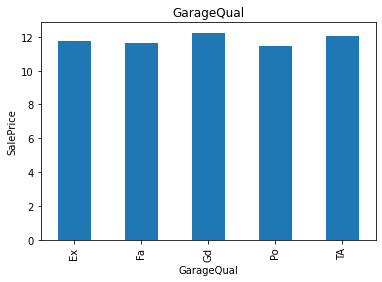

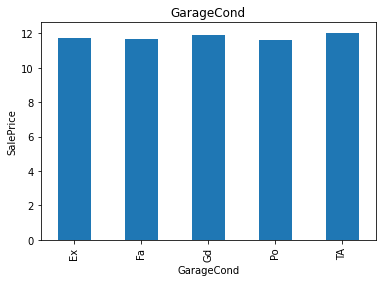

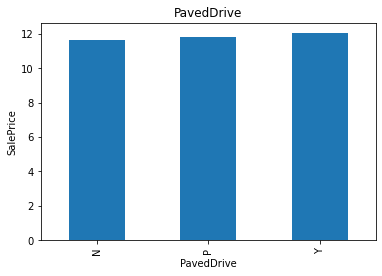

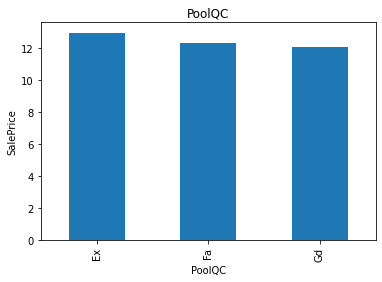

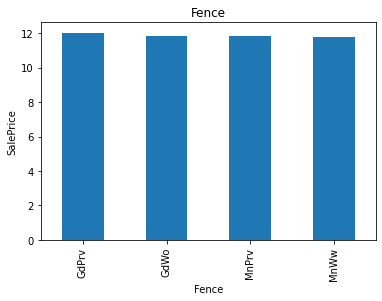

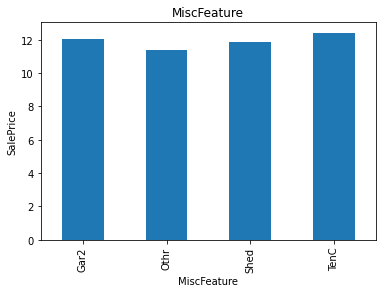

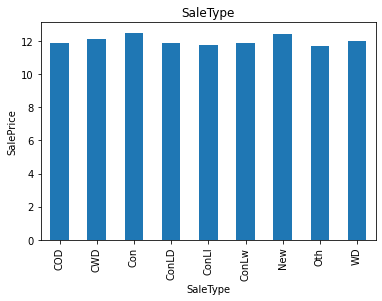

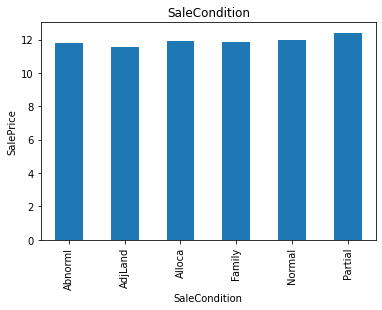

In [256]:
for feature in categorical_features:
    dataset=data.copy()
    dataset.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# FEATURE ENGINEERING

In [257]:
categorical_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes=='O']

for feature in categorical_nan:
   print("{}: {}% missing values".format(feature,np.round(data[feature].isnull().mean(),4)))

Alley: 0.9377% missing values
MasVnrType: 0.0055% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


**REPLACING ALL THE NAN VALUES FOR CATEGORICAL FEATURES.**

In [258]:
def replace_cat_feature(data,features_nan):
    dataset=data.copy()
    dataset[categorical_nan]=dataset[categorical_nan].fillna('Missing')
    return dataset

data=replace_cat_feature(data,categorical_nan)

data[categorical_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [259]:
data.head()

,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694
1,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011
2,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167
3,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398
4,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216


In [260]:
numerical_with_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes!='O']



for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.round(data[feature].isnull().mean(),4)))

MasVnrArea: 0.0055% missing value
GarageYrBlt: 0.0555% missing value


**REPLACING THE MISSING VALUES FOR NUMERICAL FEATURES USING MEDIAN***REPLACING IT WITH MEDIAN AS THERE ARE LARGE NUMBER OF OUTLIERS.

In [261]:
for feature in numerical_with_nan:
    median_value=data[feature].median()
    
    data[feature].fillna(median_value,inplace=True)
    
data[numerical_with_nan].isnull().sum()

MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [262]:
data.head()

,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694
1,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011
2,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167
3,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398
4,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216


**REPLACING THE CATEGORIES  OF EACH FEATURE OCCURING LESS THAN 0.01 BY 'RARE VAR' LABEL**

In [263]:
for feature in categorical_features:
    temp=data.groupby(feature)['SalePrice'].count()/len(data)       #GROUPING BASED ON CATEGORIES OF EACH FEATURE AND COUNTING THEM,THEN DIVIDING THEM BY TOTAL NUMBER OF COLUMNS
    temp_df=temp[temp>0.01].index                                   #STORING THE INDEX WHOSE VALUE IS MORE THAN 0.01
    data[feature]=np.where(data[feature].isin(temp_df),data[feature],'Rare_var')                      #IF VALUE IN TEMP_DF THEN IT WILLREMAIN AS IT IS ELSE WILL BE PEPLACED BY RARE_VAR

In [264]:
data.head(10)

,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694
1,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011
2,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167
3,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398
4,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216
5,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Rare_var,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,6.679599,566,0,7.216709,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,11.870600
6,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,7.434848,0,0,7.434848,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,12.634603
7,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,7.009409,983,0,7.644919,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,12.206073
8,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,6.929517,752,0,7.480992,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,Missing,Missing,Missing,0,4,2008,WD,Abnorml,11.774520
9,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Rare_var,2fmCon,Rare_var,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,N

**LABEL ENCODING**

In [265]:
for feature in categorical_features:
    labels_ordered=data.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    data[feature]=data[feature].map(labels_ordered)

In [266]:
data.head()

,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2,0,1,1,0,0,14,2,1,3,5,7,5,2003,2003,0,0,10,10,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,1,4,2003.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,12.247694
1,1,2,0,1,1,2,0,11,1,1,3,3,6,8,1976,1976,0,0,4,3,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,4,1,3,4,1976.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011
2,1,2,1,1,1,0,0,14,2,1,3,5,7,5,2001,2002,0,0,10,10,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,3,4,2001.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,12.317167
3,1,2,1,1,1,1,0,16,2,1,3,5,7,5,1915,1970,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,4,2,1998.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,11.849398
4,1,2,1,1,1,2,0,22,2,1,3,5,8,5,2000,2000,0,0,10,10,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,3,4,2000.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,12.429216


# FEATURE SELECTION

**FINDING THE CORRELATION**

In [267]:
corr=data.corr()
corr

,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Street,1.000000,-0.015720,-0.023314,-0.016663,-0.001682,0.010821,-0.179360,0.039263,-0.020043,-0.006545,0.075000,0.056122,0.058823,0.042848,0.021137,0.065465,-0.020346,0.008650,0.051535,0.053245,0.016859,0.017108,0.100247,0.000463,0.041725,0.014824,-0.006099,-0.092504,0.008772,-0.015643,0.024533,-0.038487,0.035229,0.005068,-0.009079,0.043211,0.069869,0.008929,0.004719,0.046983,0.007724,0.051486,-0.050524,0.015485,0.046471,0.027628,0.028865,0.013583,0.065669,0.046828,-0.015706,-0.005348,0.021296,0.073307,0.024339,0.015529,-0.020025,-0.047794,0.026025,0.023541,0.024521,-0.017990,-0.005664,0.023082,0.007473,-0.033160,0.004413,0.004459,-0.028098,0.138214,-0.022733,0.003690,-0.025043,0.023549,0.013120,0.057369
Alley,-0.015720,1.000000,0.094405,0.061934,-0.006407,0.080879,0.030096,0.180446,0.113452,-0.024933,0.058382,0.044513,0.099179,-0.098099,0.303155,0.073085,0.075017,0.032952,0.187020,0.193724,0.108777,0.071688,0.096200,0.078795,0.121851,0.127261,0.036911,0.116867,0.025486,0.146783,-0.037687,0.041429,-0.025866,0.141783,0.113341,0.040666,0.202835,0.141427,0.145701,-0.094750,-0.030562,0.011045,0.106976,0.015361,0.065155,0.048284,-0.031567,-0.042809,0.081457,0.007489,0.039601,0.108897,0.094526,0.238435,0.198821,0.182637,0.086341,0.095002,0.095682,0.135062,0.229766,0.100516,-0.046981,-0.185081,0.028470,0.023216,0.016810,0.016986,0.014131,0.018705,0.001162,0.013094,0.020944,0.028727,0.037882,0.157281
LotShape,-0.023314,0.094405,1.000000,0.150626,-0.022853,0.369185,0.155286,0.254894,0.117174,-0.047369,0.102734,0.121244,0.191561,-0.023305,0.218452,0.173964,0.019973,0.109615,0.127325,0.125341,0.040413,0.086837,0.183954,0.050044,0.176295,0.211676,0.103539,0.171771,0.092265,0.127360,0.036395,0.065843,0.014477,0.171202,0.055258,0.119036,0.096860,0.097945,0.161261,0.094304,0.002468,0.194080,0.049110,0.069925,0.182100,0.114515,0.057495,-0.091358,0.155085,0.130492,0.025180,0.181535,0.167783,0.203254,0.188086,0.224514,0.190788,0.164505,0.107800,0.107003,0.103826,0.158937,0.096005,-0.094764,0.036692,0.073205,0.027191,0.030247,0.090504,-0.017967,0.024726,0.024876,-0.028792,0.045890,0.048421,0.281623
LandContour,-0.016663,0.061934,0.150626,1.000000,0.002910,0.085175,0.300280,0.177480,0.000243,0.026428,0.053939,0.061956,0.105468,-0.042437,0.135145,0.094433,0.045407,0.088662,0.090305,0.088115,0.067133,0.030356,0.090455,0.005708,0.107498,0.132861,0.014073,0.226922,0.067466,0.081854,0.025710,0.001652,0.000150,0.085858,0.022544,0.053028,0.078721,0.042892,0.061706,-0.022667,-0.084768,0.030928,0.087924,0.062529,0.060142,0.003181,-0.065825,-0.023507,0.081819,-0.014808,0.013758,0.078571,0.089849,0.096785,0.097761,0.125834,0.126384,0.109451,0.059207,0.044006,0.072090,0.097112,-0.026859,-0.066415,0.048381,0.002255,-0.025836,-0.029762,0.064261,-0.014615,0.000096,0.084236,-0.016689,0.066804,0.071651,0.154134
Utilities,-0.001682,-0.006407,-0.022853,0.002910,1.000000,-0.086979,0.005909,-0.036730,-0.001202,-0.002667,-0.003252,-0.012729,0.001881,-0.009994,0.011505,0.034080,0.013620,0.003525,0.005411,0.008968,-0.012608,-0.063452,0.018054,-0.008419,0.017005,0.017164,-0.002486,0.015461,-0.026337,0.019100,0.058984,-0.049913,0.012639,0.014233,-0.003700,0.003963,-0.006907

**THE CORRELATION MATRIX**

[]

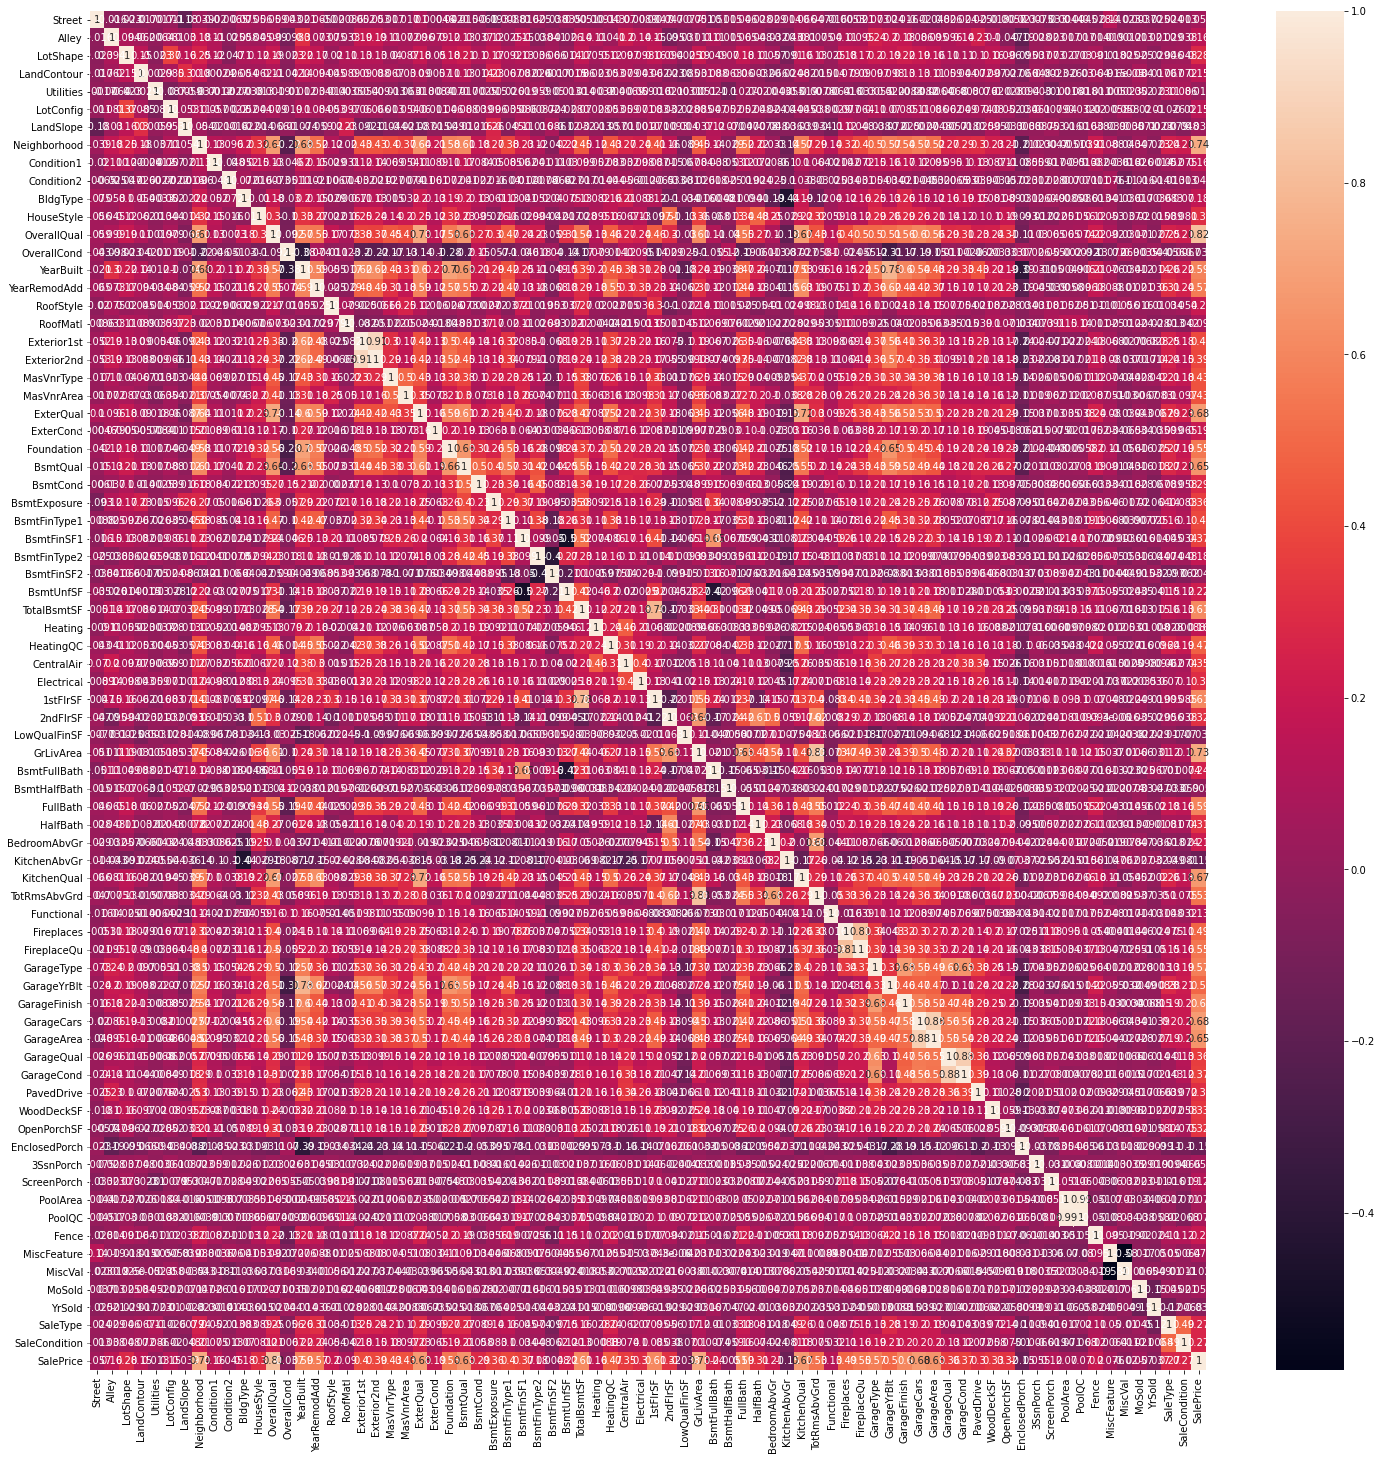

In [268]:
plt.figure(figsize=(25,25))
sns.heatmap(corr,annot=True)
plt.plot()

In [269]:
sp_corr = corr['SalePrice']                             
sp_corr

Street           0.057369
Alley            0.157281
LotShape         0.281623
LandContour      0.154134
Utilities        0.012632
                   ...   
MoSold           0.057329
YrSold          -0.037263
SaleType         0.266186
SaleCondition    0.266811
SalePrice        1.000000
Name: SalePrice, Length: 76, dtype: float64

**DROPPING FEATURES HAVING  CORRELATION LESS THAN 0.2 WITH SALE PRICE.**

In [270]:
to_drop=[]
for i in range(len(sp_corr)):
  if sp_corr[i] < 0.20:
    to_drop.append(i)
data=data.drop(data.columns[to_drop],axis=1)

In [271]:
data

,LotShape,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,0,14,5,7,2003,2003,10,10,2,196.0,2,4,3,3,1,6,706,150,856,4,1,3,6.752270,854,7.444249,1,2,1,3,2,8,0,1,4,2003.0,2,2,548,2,3,2,0,61,2,3,12.247694
1,0,11,3,6,1976,1976,4,3,1,0.0,1,2,3,3,4,4,978,284,1262,4,1,3,7.140453,0,7.140453,0,2,0,3,1,6,1,3,4,1976.0,2,2,460,2,3,2,298,0,2,3,12.109011
2,1,14,5,7,2001,2002,10,10,2,162.0,2,4,3,3,2,6,486,434,920,4,1,3,6.824374,866,7.487734,1,2,1,3,2,6,1,3,4,2001.0,2,2,608,2,3,2,0,42,2,3,12.317167
3,1,16,5,7,1915,1970,2,4,1,0.0,1,1,2,4,1,4,216,540,756,3,1,3,6.867974,756,7.448334,1,1,0,3,2,7,1,4,2,1998.0,1,3,642,2,3,2,0,35,2,0,11.849398
4,1,22,5,8,2000,2000,10,10,2,350.0,2,4,3,3,3,6,655,490,1145,4,1,3,7.043160,1053,7.695303,1,2,1,4,2,9,1,3,4,2000.0,2,3,836,2,3,2,192,84,2,3,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,13,5,6,1999,2000,10,10,1,0.0,1,4,3,3,1,5,0,953,953,4,1,3,6.859615,694,7.406711,0,2,1,3,1,7,1,3,4,1999.0,2,2,460,2,3,2,0,40,2,3,12.072541
1456,0,12,3,6,1978,1988,7,7,4,119.0,1,2,3,3,1,4,790,589,1542,2,1,3,7.636752,0,7.636752,1,2,0,3,1,7,2,3,4,1978.0,1,2,500,2,3,2,349,0,2,3,12.254863
1457,0,16,5,7,1941,2006,9,9,1,0.0,3,3,2,4,1,6,275,877,1152,4,1,3,7.080026,1152,7.757906,0,2,0,4,2,9,2,4,4,1941.0,2,1,252,2,3,2,0,60,2,3,12.493130
1458,0,8,3,5,1950,1996,4,3,1,0.0,1,2,2,3,2,6,49,0,1078,3,1,2,6.982863,0,6.982863,1,1,0,2,2,5,0,1,4,1950.0,1,1,240,2,3,2,366,0,2,3,11.864462


In [272]:
X=data.iloc[: , :-1]
y=data.SalePrice

In [273]:
X.head()

,LotShape,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
0,0,14,5,7,2003,2003,10,10,2,196.0,2,4,3,3,1,6,706,150,856,4,1,3,6.752270,854,7.444249,1,2,1,3,2,8,0,1,4,2003.0,2,2,548,2,3,2,0,61,2,3
1,0,11,3,6,1976,1976,4,3,1,0.0,1,2,3,3,4,4,978,284,1262,4,1,3,7.140453,0,7.140453,0,2,0,3,1,6,1,3,4,1976.0,2,2,460,2,3,2,298,0,2,3
2,1,14,5,7,2001,2002,10,10,2,162.0,2,4,3,3,2,6,486,434,920,4,1,3,6.824374,866,7.487734,1,2,1,3,2,6,1,3,4,2001.0,2,2,608,2,3,2,0,42,2,3
3,1,16,5,7,1915,1970,2,4,1,0.0,1,1,2,4,1,4,216,540,756,3,1,3,6.867974,756,7.448334,1,1,0,3,2,7,1,4,2,1998.0,1,3,642,2,3,2,0,35,2,0
4,1,22,5,8,2000,2000,10,10,2,350.0,2,4,3,3,3,6,655,490,1145,4,1,3,7.043160,1053,7.695303,1,2,1,4,2,9,1,3,4,2000.0,2,3,836,2,3,2,192,84,2,3


In [274]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [275]:
X.shape

(1460, 45)

**FEATURE IMPORTANCE**

In [276]:
X_copy=X.copy()
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_copy,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

**PRINTING THE SCORE OF EACH FEATURE.**

In [278]:
print(model.feature_importances_)

[0.00383955 0.08232268 0.00316656 0.17775188 0.02228738 0.00769854
 0.00397785 0.0033331  0.00252317 0.00292295 0.13571443 0.00307903
 0.02973422 0.00354048 0.00480913 0.00318634 0.01246879 0.00397723
 0.0177289  0.00363564 0.0295725  0.00200507 0.02294065 0.00947819
 0.08649189 0.00664258 0.036664   0.0043653  0.00869672 0.06898402
 0.00925265 0.01365182 0.02327554 0.01859084 0.00504098 0.01989222
 0.06106894 0.01845921 0.00317403 0.00337817 0.00340976 0.00356657
 0.00518944 0.00212402 0.00638704]


**SHOWING THE GRAPHICAL REPRESENTATION OF TOP 10 FEATURES.**

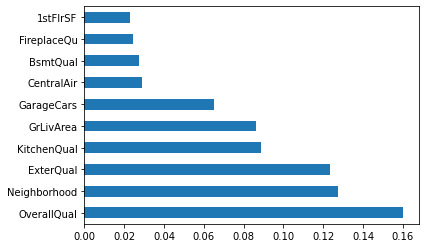

In [209]:
feat_importances = pd.Series(model.feature_importances_, index=X_copy.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [279]:
imp_features=feat_importances.nlargest(30)                                      #LISTING THE TOP 30 FEATURES
imp_features

OverallQual      0.160290
Neighborhood     0.127353
ExterQual        0.123253
KitchenQual      0.088772
GrLivArea        0.085997
GarageCars       0.065158
CentralAir       0.028889
BsmtQual         0.027390
FireplaceQu      0.024642
1stFlrSF         0.022779
FullBath         0.017191
GarageFinish     0.016892
TotalBsmtSF      0.016700
GarageArea       0.015468
GarageType       0.013558
Fireplaces       0.013089
BsmtFinSF1       0.012761
YearBuilt        0.012511
2ndFlrSF         0.009882
YearRemodAdd     0.009805
BedroomAbvGr     0.009284
TotRmsAbvGrd     0.008671
BsmtFullBath     0.006894
GarageYrBlt      0.006866
SaleCondition    0.006571
BsmtExposure     0.005007
OpenPorchSF      0.004819
Foundation       0.003968
BsmtUnfSF        0.003891
HalfBath         0.003868
dtype: float64

In [280]:
imp=imp_features.index

In [281]:
imp

Index(['OverallQual', 'Neighborhood', 'ExterQual', 'KitchenQual', 'GrLivArea',
       'GarageCars', 'CentralAir', 'BsmtQual', 'FireplaceQu', '1stFlrSF',
       'FullBath', 'GarageFinish', 'TotalBsmtSF', 'GarageArea', 'GarageType',
       'Fireplaces', 'BsmtFinSF1', 'YearBuilt', '2ndFlrSF', 'YearRemodAdd',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'BsmtFullBath', 'GarageYrBlt',
       'SaleCondition', 'BsmtExposure', 'OpenPorchSF', 'Foundation',
       'BsmtUnfSF', 'HalfBath'],
      dtype='object')

In [282]:
to_select=[]
for i in imp:
  to_select.append(i)


In [283]:
to_select

['OverallQual',
 'Neighborhood',
 'ExterQual',
 'KitchenQual',
 'GrLivArea',
 'GarageCars',
 'CentralAir',
 'BsmtQual',
 'FireplaceQu',
 '1stFlrSF',
 'FullBath',
 'GarageFinish',
 'TotalBsmtSF',
 'GarageArea',
 'GarageType',
 'Fireplaces',
 'BsmtFinSF1',
 'YearBuilt',
 '2ndFlrSF',
 'YearRemodAdd',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'BsmtFullBath',
 'GarageYrBlt',
 'SaleCondition',
 'BsmtExposure',
 'OpenPorchSF',
 'Foundation',
 'BsmtUnfSF',
 'HalfBath']

In [292]:
X=X[to_select]

In [293]:
X.shape

(1460, 30)

**OUTLIER DETECTION USING BOX PLOT**

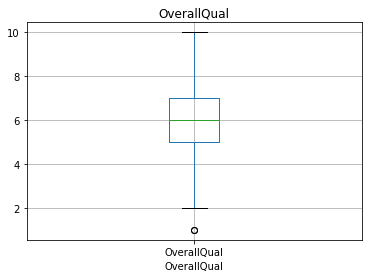

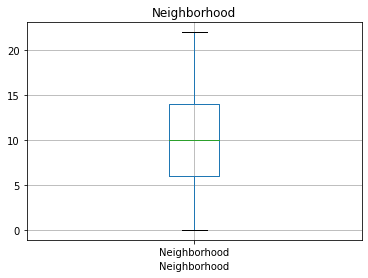

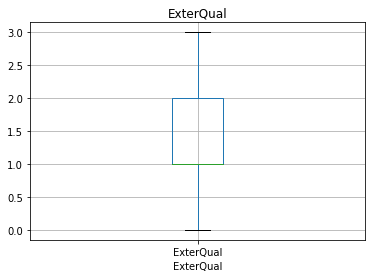

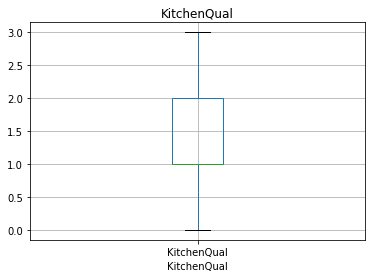

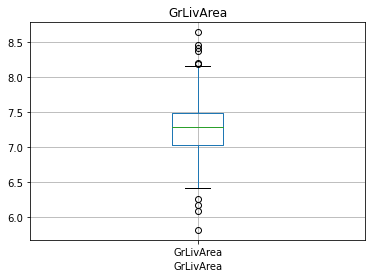

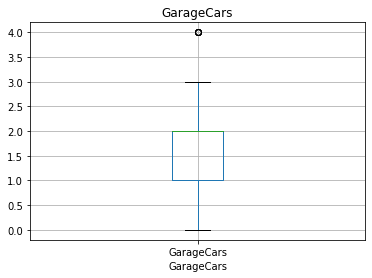

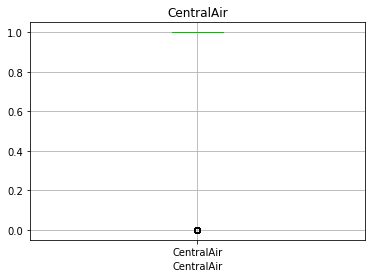

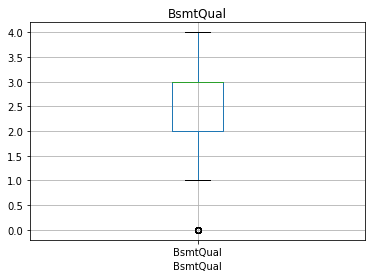

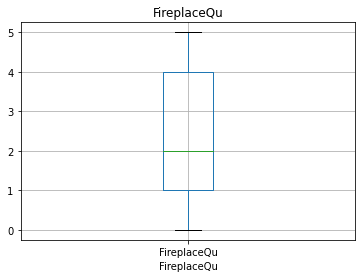

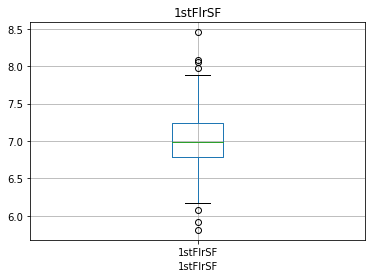

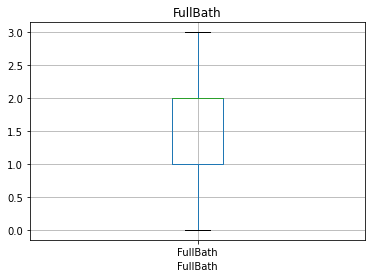

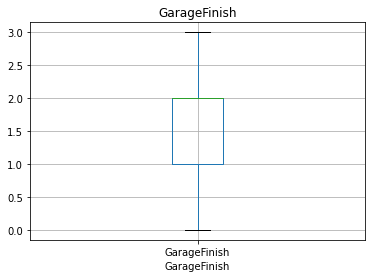

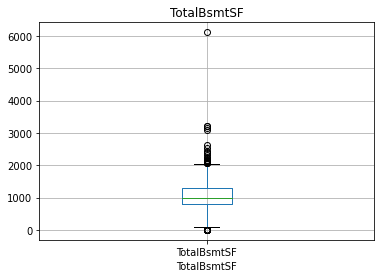

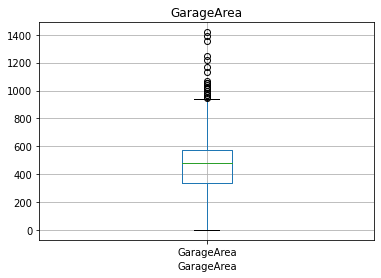

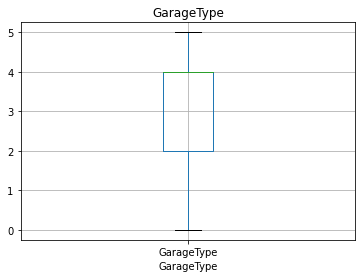

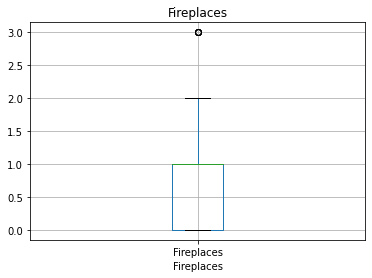

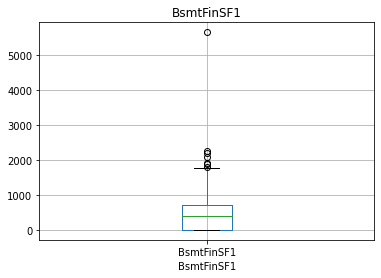

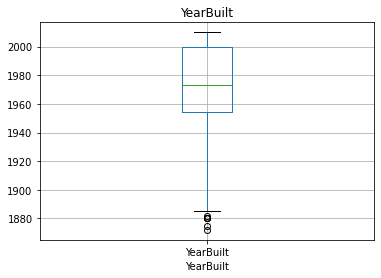

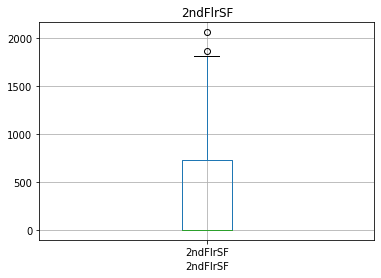

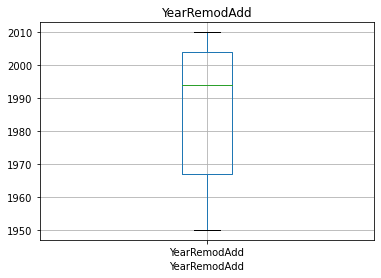

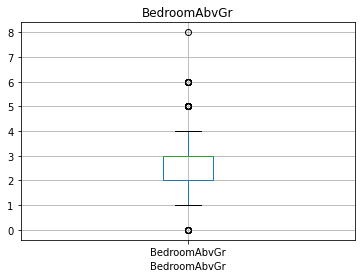

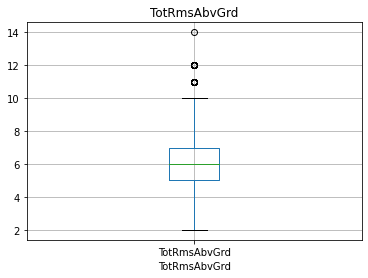

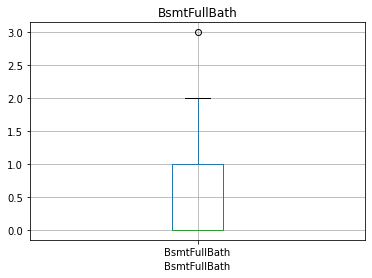

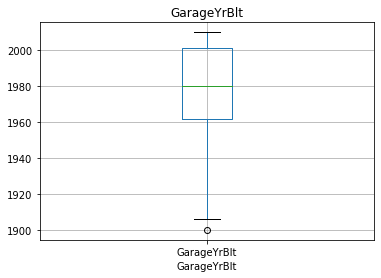

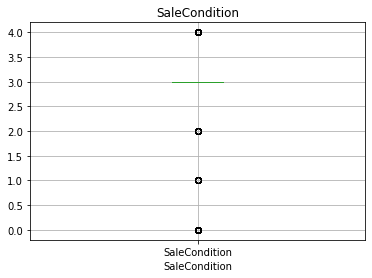

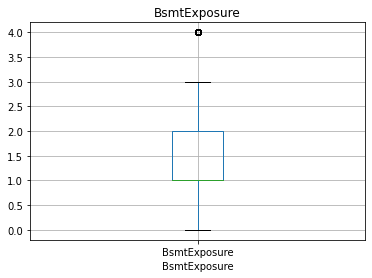

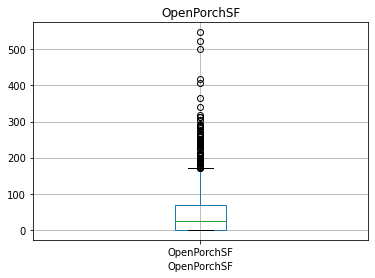

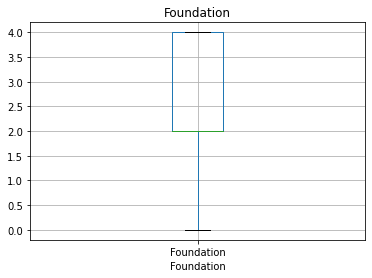

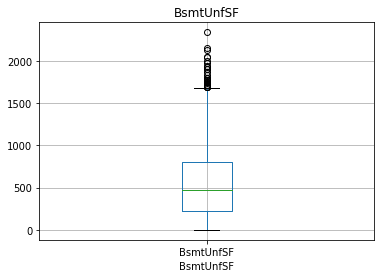

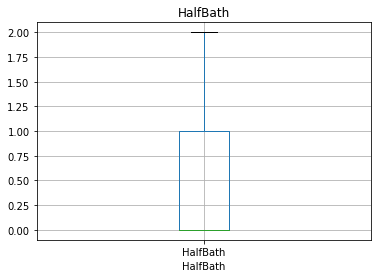

In [294]:
for feature in X.columns:
  
  if 0 in X.columns.unique():
    pass
  else:
    data.boxplot(feature)
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

**NORMALIZING THE DATASET USING MIN-MAX SCALER.**

In [295]:
feature_scale=[feature for feature in X.columns ]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [296]:
scaler.transform(X[feature_scale])

array([[0.66666667, 0.63636364, 0.66666667, ..., 1.        , 0.06421233,
        0.5       ],
       [0.55555556, 0.5       , 0.33333333, ..., 0.5       , 0.12157534,
        0.        ],
       [0.66666667, 0.63636364, 0.66666667, ..., 1.        , 0.18578767,
        0.5       ],
       ...,
       [0.66666667, 0.72727273, 1.        , ..., 0.75      , 0.37542808,
        0.        ],
       [0.44444444, 0.36363636, 0.33333333, ..., 0.5       , 0.        ,
        0.        ],
       [0.44444444, 0.22727273, 0.66666667, ..., 0.5       , 0.05821918,
        0.5       ]])

In [297]:
X= pd.concat([pd.DataFrame(scaler.transform(X[feature_scale]), columns=feature_scale)],
                    axis=1)

In [298]:
X.shape

(1460, 30)

# MODEL BUILDING

**SPLITTING THE DATA INTO TRAIN AND TEST SET.**

In [299]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [300]:
x_train.head()

,OverallQual,Neighborhood,ExterQual,KitchenQual,GrLivArea,GarageCars,CentralAir,BsmtQual,FireplaceQu,1stFlrSF,FullBath,GarageFinish,TotalBsmtSF,GarageArea,GarageType,Fireplaces,BsmtFinSF1,YearBuilt,2ndFlrSF,YearRemodAdd,BedroomAbvGr,TotRmsAbvGrd,BsmtFullBath,GarageYrBlt,SaleCondition,BsmtExposure,OpenPorchSF,Foundation,BsmtUnfSF,HalfBath
68,0.333333,0.181818,0.333333,0.333333,0.284742,0.25,1.0,0.50,0.2,0.304610,0.333333,0.333333,0.122259,0.155148,0.8,0.000000,0.000000,0.528986,0.000000,0.000000,0.250,0.166667,0.000000,0.409091,0.75,0.25,0.00000,0.50,0.319777,0.0
39,0.333333,0.227273,0.333333,0.000000,0.437983,0.00,0.0,0.00,0.2,0.468544,0.666667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.601449,0.000000,0.083333,0.250,0.333333,0.000000,0.727273,0.25,0.00,0.00000,1.00,0.000000,0.0
1190,0.333333,0.409091,0.333333,0.333333,0.559022,1.00,1.0,0.50,0.6,0.598028,0.333333,1.000000,0.204419,0.956276,0.2,0.333333,0.205351,0.644928,0.000000,0.416667,0.375,0.416667,0.333333,0.681818,0.75,0.75,0.00000,0.50,0.038527,0.0
942,0.333333,0.227273,0.333333,0.333333,0.516920,0.00,1.0,0.75,0.2,0.552989,0.666667,0.000000,0.235679,0.000000,0.0,0.000000,0.255138,0.760870,0.000000,0.450000,0.500,0.500000,0.666667,0.727273,0.00,1.00,0.00000,1.00,0.000000,0.0
185,1.000000,0.181818,0.666667,1.000000,0.841844,0.75,1.0,0.50,0.6,0.572951,0.666667,0.333333,0.181178,0.592384,0.4,0.666667,0.000000,0.144928,0.735109,0.716667,0.500,0.833333,0.000000,0.845455,0.75,0.50,0.47532,0.25,0.473887,0.5


In [301]:
y_train.head()

68      11.289782
39      11.314475
1190    12.031719
942     11.918391
185     13.071070
Name: SalePrice, dtype: float64

In [302]:
x_test.head()

,OverallQual,Neighborhood,ExterQual,KitchenQual,GrLivArea,GarageCars,CentralAir,BsmtQual,FireplaceQu,1stFlrSF,FullBath,GarageFinish,TotalBsmtSF,GarageArea,GarageType,Fireplaces,BsmtFinSF1,YearBuilt,2ndFlrSF,YearRemodAdd,BedroomAbvGr,TotRmsAbvGrd,BsmtFullBath,GarageYrBlt,SaleCondition,BsmtExposure,OpenPorchSF,Foundation,BsmtUnfSF,HalfBath
464,0.444444,0.636364,0.333333,0.333333,0.401802,0.00,1.0,0.75,0.2,0.429838,0.666667,0.000000,0.170213,0.000000,0.0,0.000000,0.109142,0.768116,0.000000,0.466667,0.375,0.250000,0.000000,0.727273,0.75,0.25,0.000000,0.50,0.181507,0.0
1400,0.555556,0.136364,0.333333,0.333333,0.439821,0.25,1.0,0.50,0.8,0.395584,0.333333,0.666667,0.141080,0.146685,1.0,0.333333,0.000000,0.413043,0.100726,0.000000,0.375,0.250000,0.000000,0.263636,0.75,0.25,0.000000,0.25,0.369007,0.0
173,0.555556,0.363636,0.333333,0.333333,0.497220,0.50,1.0,0.50,0.6,0.531914,0.333333,0.333333,0.222913,0.355430,0.8,0.333333,0.051028,0.644928,0.000000,0.183333,0.375,0.333333,0.333333,0.554545,0.75,0.25,0.036563,0.50,0.299658,0.5
522,0.555556,0.136364,0.333333,0.333333,0.568066,0.50,1.0,0.50,0.8,0.416506,0.666667,0.333333,0.164321,0.296192,0.4,0.666667,0.070695,0.543478,0.319613,0.000000,0.375,0.416667,0.000000,0.454545,0.75,0.25,0.043876,0.50,0.258990,0.0
304,0.666667,0.181818,0.333333,0.666667,0.830385,0.75,1.0,0.50,1.0,0.610196,1.000000,0.333333,0.240589,0.613540,0.8,0.333333,0.000000,0.057971,0.880387,0.866667,0.375,0.666667,0.000000,0.936364,0.75,0.25,0.000000,0.25,0.629281,0.0


In [303]:
y_test.head()

464     11.728037
1400    11.695247
173     12.001505
522     11.976659
304     12.594731
Name: SalePrice, dtype: float64

**LINEAR REGRESSION**

In [304]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
lr_score=r2_score(y_test,y_pred)
lr_score

0.8986501613337312

**DECISION TREE REGRESSION**

In [306]:
from sklearn.tree import DecisionTreeRegressor
DTR= DecisionTreeRegressor()
DTR.fit(x_train, y_train)
DTR_pred=DTR.predict(x_test)
DTR_score=r2_score(y_test,DTR_pred)
DTR_score

0.7794344751736013

**RANDOM FOREST REGRESSION**

In [308]:
from sklearn.ensemble import RandomForestRegressor
RFR= RandomForestRegressor(n_estimators =10, random_state = 0)
RFR.fit(x_train,y_train)
RFR_pred=RFR.predict(x_test)
RFR_score=r2_score(y_test,RFR_pred)
RFR_score


0.8659367357024694

**KNEIGHBOURS REGRESSION**

In [309]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x_train,y_train) 
pred=neigh.predict(x_test)
neigh_score=r2_score(y_test,pred)
neigh_score

0.8141779450850033

**XGBOOST**

In [310]:
import xgboost as xg
xgb_r=xg.XGBRegressor(n_estimators =100)
  
# Fitting the model
xgb_r.fit(x_train,y_train)
  
# Predict the modeL
pred1= xgb_r.predict(x_test)
xgb_score=r2_score(y_test,pred1)
xgb_score

[15:16:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9004938331219039

In [311]:
df=pd.DataFrame({"Model":["Linear Regression","Decision Tree Classifier","Random Forest Classifier","kneighbours","xgboost"],"Accuracy":[lr_score,DTR_score,RFR_score,neigh_score,xgb_score]})

In [312]:
df

,Model,Accuracy
0,Linear Regression,0.898650
1,Decision Tree Classifier,0.779434
2,Random Forest Classifier,0.865937
3,kneighbours,0.814178
4,xgboost,0.900494
